# Data Preprocessing using Python - Outliers


Learn how to effectively prepare data for successful data analytics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\AJANTHA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\AJANTHA\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Outliers 
### Detecting Outliers
#### Univariate Outlier detection

In [2]:
column_df = pd.read_csv('data/columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [3]:
response_df = pd.read_csv('data/responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


#### Example of detecting outliers across one numerical attribute

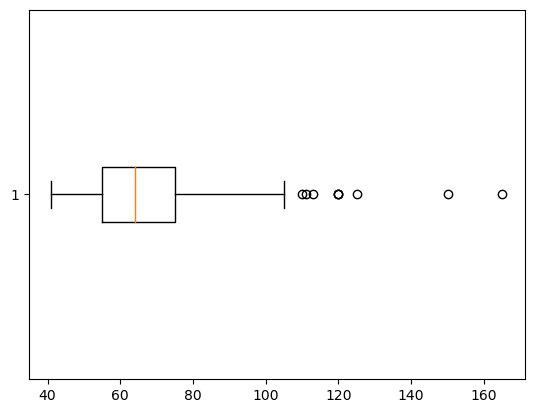

In [4]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [5]:
response_df[response_df.Weight>105]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [6]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000288BF2AECA0>, <matplotlib.lines.Line2D object at 0x00000288BF2AEF70>], 'caps': [<matplotlib.lines.Line2D object at 0x00000288BF2CE280>, <matplotlib.lines.Line2D object at 0x00000288BF2CE550>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000288BF2AE9D0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000288BF2CE820>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000288BF2CEAF0>], 'means': []}


In [7]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [8]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across one categorical attribute

In [9]:
response_df.Education.value_counts()

Education
secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: count, dtype: int64

<AxesSubplot:xlabel='Education'>

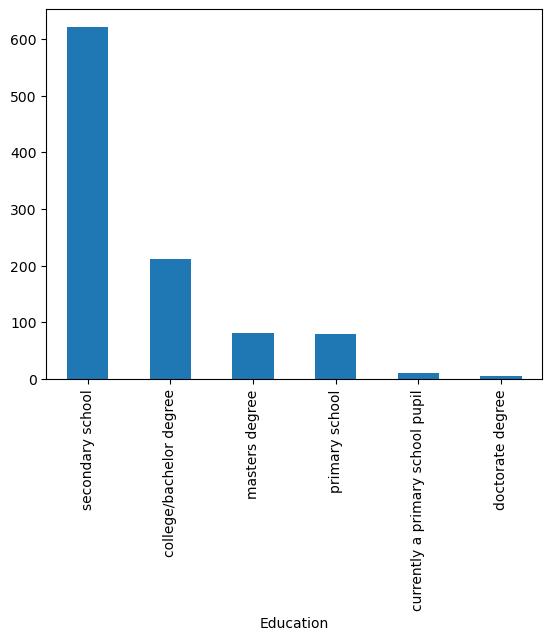

In [10]:
response_df.Education.value_counts().plot.bar()

### Bivariate Outlier detection
#### Example of detecting outliers across two numerical attributes


<AxesSubplot:xlabel='Height', ylabel='Weight'>

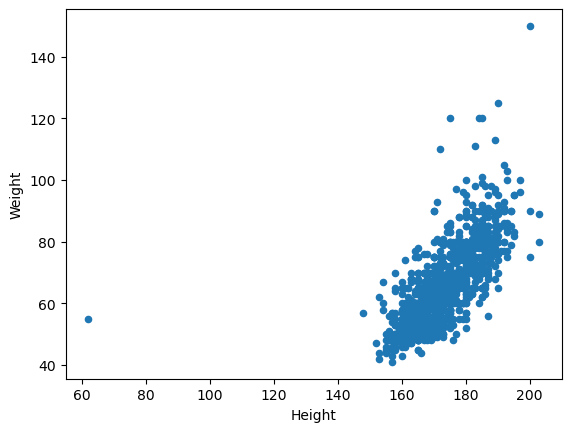

In [11]:
response_df.plot.scatter(x='Height',y='Weight')

In [12]:
BM = (response_df.Weight>130) | (response_df.Height<70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across two categorical attributes

In [13]:
pd.crosstab(response_df['Education'],response_df['God'])

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


<AxesSubplot:xlabel='God', ylabel='Education'>

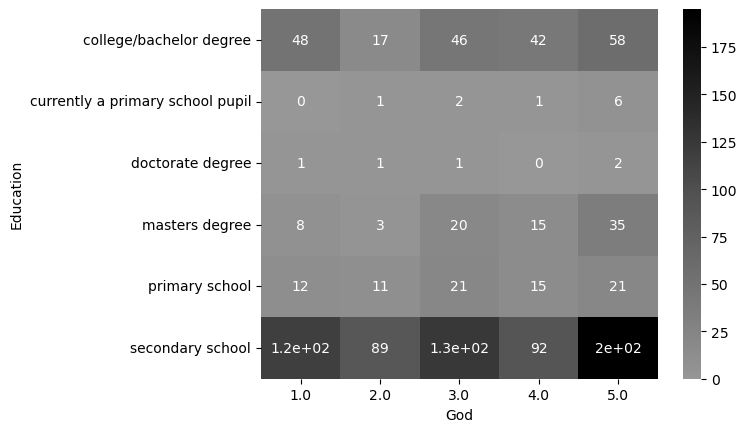

In [14]:
cont_table = pd.crosstab(response_df['Education'],response_df['God'])
sns.heatmap(cont_table,annot=True, center=0.5 ,cmap="Greys")

In [15]:
response_df.query('Education== "currently a primary school pupil" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [16]:
response_df.query('Education== "currently a primary school pupil" & God==4')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [17]:
response_df.query('Education== "doctorate degree" & God==1')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [18]:
response_df.query('Education== "doctorate degree" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [19]:
response_df.query('Education== "doctorate degree" & God==3')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


#### Example of detecting outliers across two attributes one categorical and the other numerical

<AxesSubplot:xlabel='Age', ylabel='Education'>

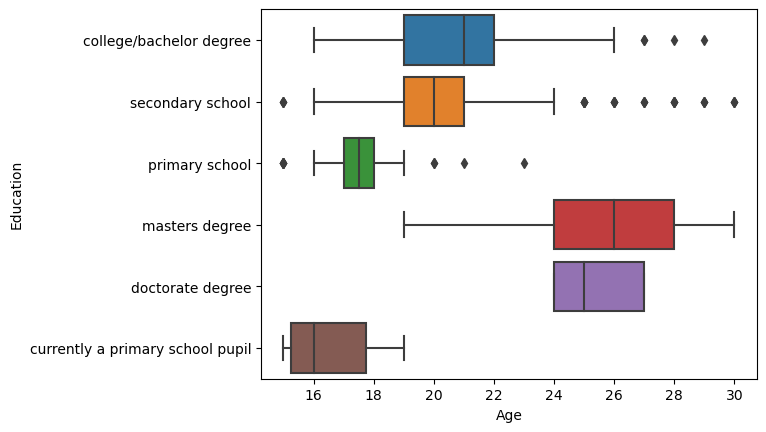

In [20]:
sns.boxplot(x=response_df.Age,y=response_df.Education)

In [21]:
BM1 = (response_df.Education=='college/bachelor degree') & (response_df.Age>26)
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age>24) | (response_df.Age<16))
BM3 = (response_df.Education == 'primary school') & ((response_df.Age>19) | (response_df.Age<16))
BM = BM1 | BM2 | BM3
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


### Multivariate Outlier detection
#### Example of detecting outliers across four attributes using clustering analysis

In [22]:
dimensions = ['Country', 'Metal or Hardrock','Folk','Musical']
Xs = response_df[dimensions]

In [23]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


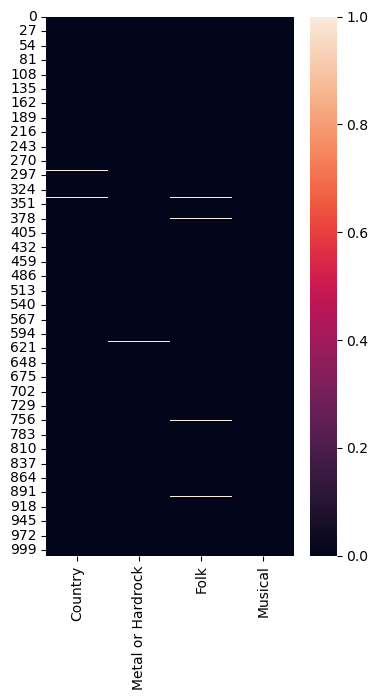

In [24]:
plt.figure(figsize=(4,7))
sns.heatmap(Xs.isna())
plt.show()

In [25]:
Q3 = Xs.quantile(0.75)
Q1 = Xs.quantile(0.25)
IQR = Q3 - Q1
Xs = Xs.fillna(Q3+IQR*1.5)

In [26]:
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())

In [ ]:
# from sklearn.cluster import KMeans
# for k in range(2,8):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(Xs)
#     print('k={}'.format(k))
#     for i in range(k):
#         BM = kmeans.labels_==i
#         print('Cluster {}: {}'.format(i,Xs[BM].index.values))
#     print('--------- Divider ----------')

## Dealing with outliers
### First Approach: Do nothing
### Second Approach: Replace with the upper cap or the lower cap
### Third Approach: Perform log transformation 
### Fourth Approach: Remove data objects with outliers	
### Choosing the right approach in dealing with outliers	
### Example 1

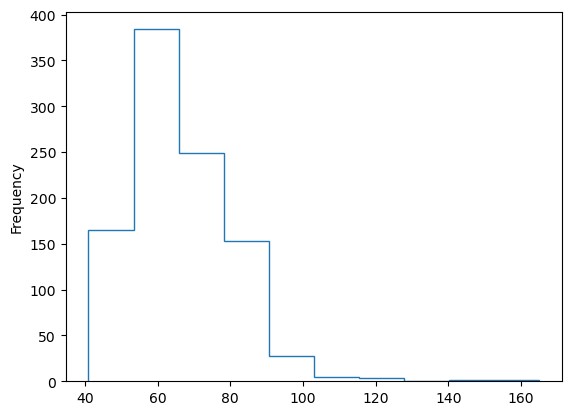

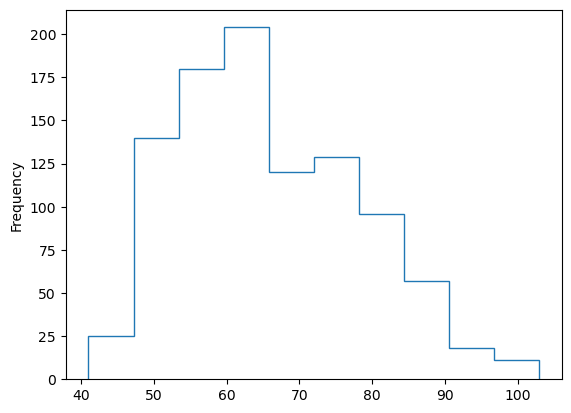

In [27]:
response_df.Weight.plot.hist(histtype='step')
plt.show()
BM = response_df.Weight<105
response_df.Weight[BM].plot.hist(histtype='step')
plt.show()

### Example 2

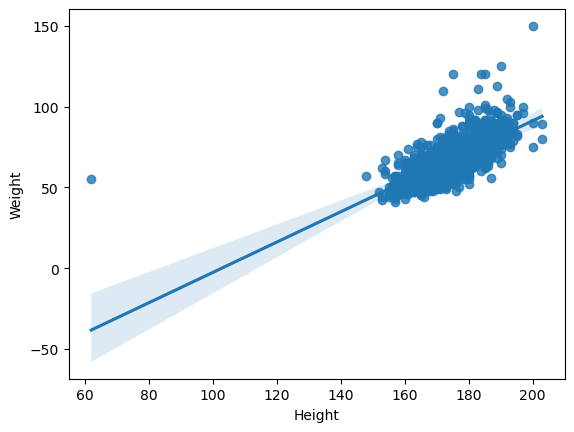

In [28]:
sns.regplot(x='Height',
           y='Weight',data=response_df)
plt.show()

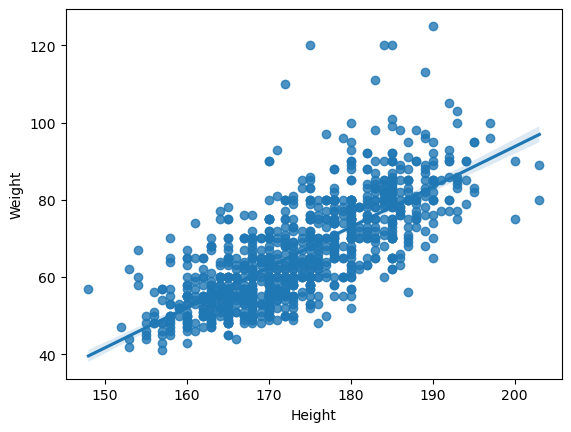

In [29]:
BM = (response_df.Weight>130) | (response_df.Height<70)
sns.regplot(x='Height',
           y='Weight',data=response_df[~BM])
plt.show()

### Example 3

#### Dealing with missing values

In [30]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  990 non-null    float64
 1   Height  990 non-null    float64
 2   Gender  1004 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [31]:
pre_process_df.dropna(inplace=True)

In [32]:
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  975 non-null    float64
 1   Height  975 non-null    float64
 2   Gender  975 non-null    object 
dtypes: float64(2), object(1)
memory usage: 30.5+ KB


#### Detecting univariate outliers and dealing with them

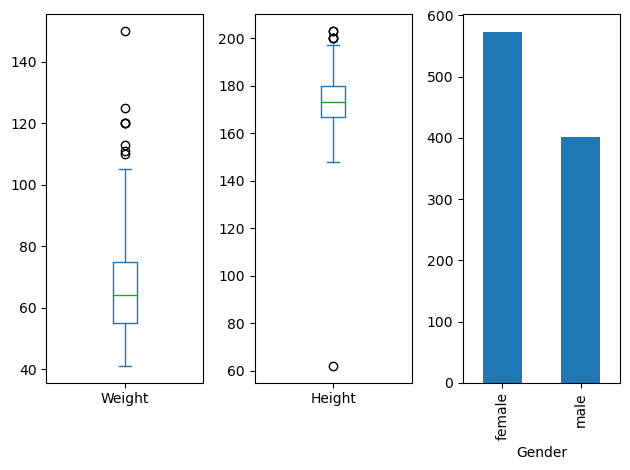

In [33]:
num_attributes = ['Weight','Height']
for i,att in enumerate(num_attributes):
    plt.subplot(1,3,i+1)
    pre_process_df[att].plot.box()

plt.subplot(1,3,3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [34]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3+IQR*1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Weight'] = upper_cap

<AxesSubplot:>

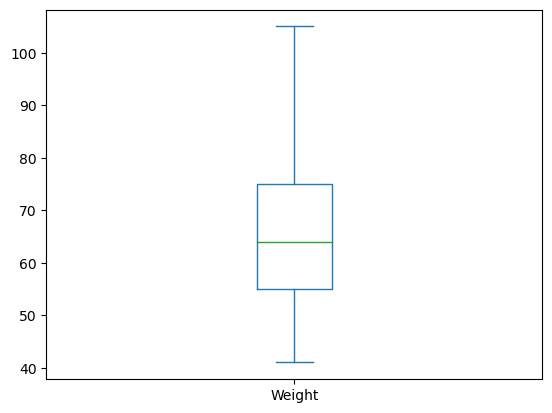

In [35]:
pre_process_df.Weight.plot.box()

In [36]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

<AxesSubplot:>

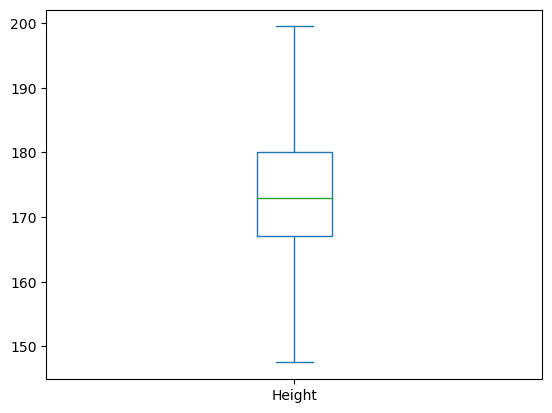

In [37]:
pre_process_df.Height.plot.box()

#### Detecting bivariate outliers and dealing with them

<AxesSubplot:xlabel='Height', ylabel='Weight'>

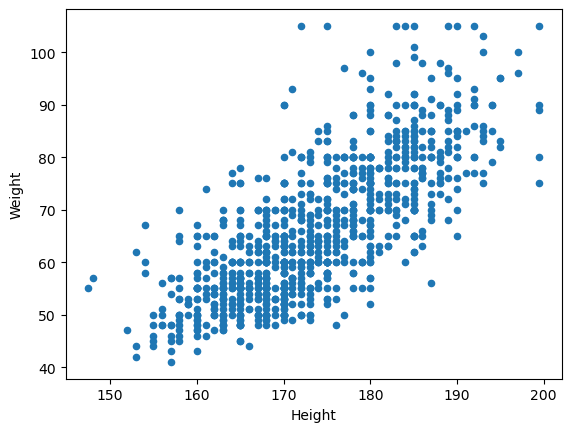

In [38]:
pre_process_df.plot.scatter(x='Height',y='Weight')

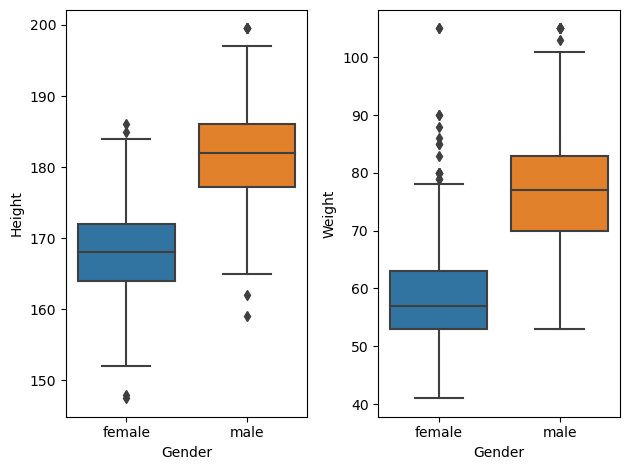

In [39]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

In [40]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Height.quantile(0.75)
    Q1 = wdf.Height.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Height > upper_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = upper_cap
    
    BM = wdf.Height < lower_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = lower_cap

In [41]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Weight.quantile(0.75)
    Q1 = wdf.Weight.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Weight > upper_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = upper_cap
    
    BM = wdf.Weight < lower_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = lower_cap

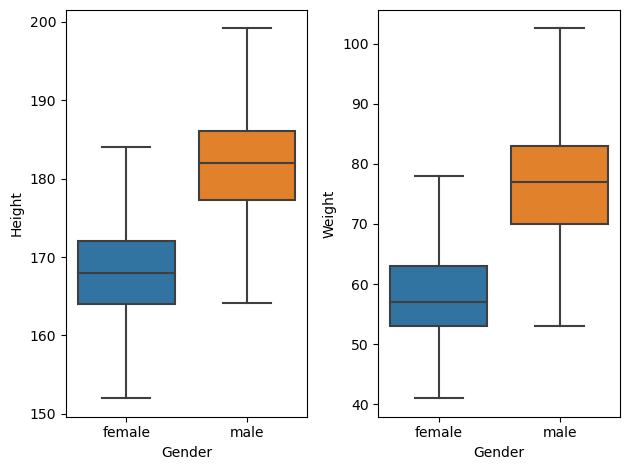

In [42]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

#### Detecting multivariate outliers and dealing with them

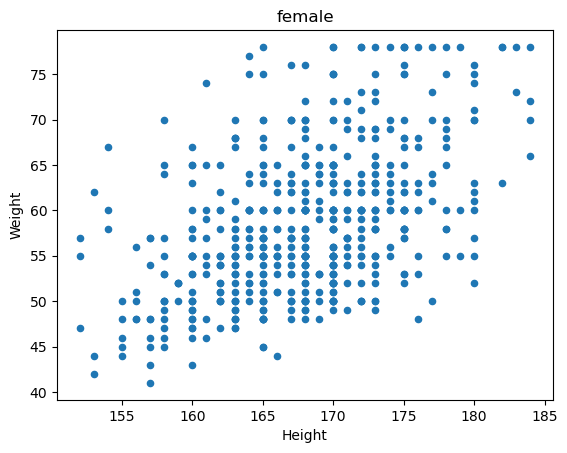

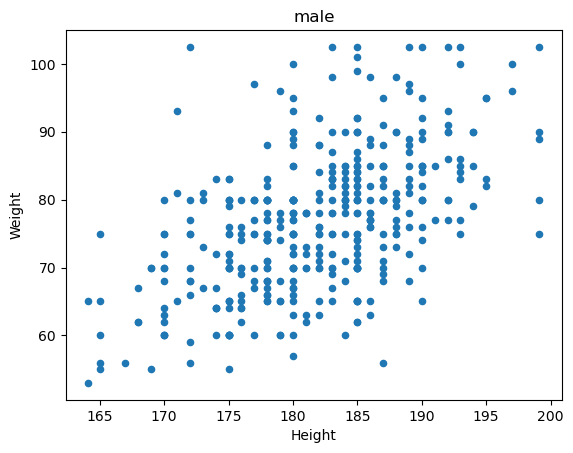

In [43]:
cat_attribute_poss = pre_process_df.Gender.unique()
for i,poss in enumerate(cat_attribute_poss):
    BM = pre_process_df.Gender == poss
    pre_process_df[BM].plot.scatter(x='Height',y='Weight')
    plt.title(poss)
    plt.show()

### Example 5

In [44]:
community_df = pd.read_csv('data/chicago_population.csv')
community_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   population  77 non-null     int64  
 2   income      77 non-null     int64  
 3   latino      77 non-null     float64
 4   black       77 non-null     float64
 5   white       77 non-null     float64
 6   asian       77 non-null     float64
 7   other       77 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.9+ KB


#### Detecting univariate outliers and dealing with them

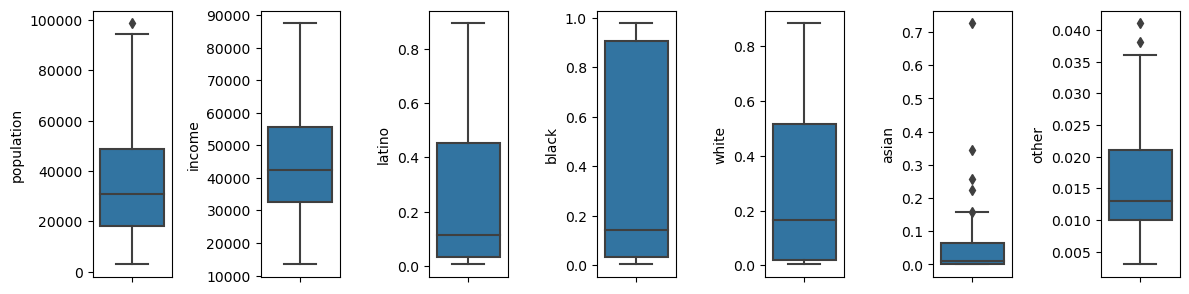

In [45]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=community_df[att])
plt.tight_layout()
plt.show()

In [46]:
pre_process_df = community_df.set_index('name')
candidate_atts = ['population','asian','other']

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

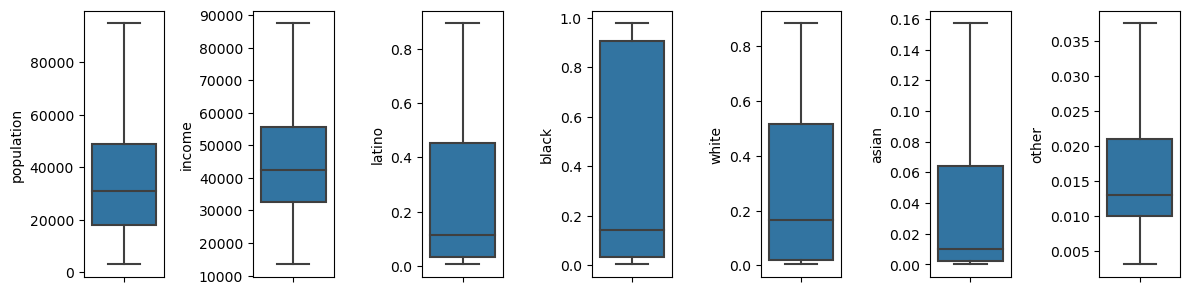

In [47]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()

#### Detecting bivariate and multivariate outliers and dealing with them
#### Applying K-Means

In [ ]:
# from sklearn.cluster import KMeans
# dimensions = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
# Xs = pre_process_df[dimensions]
# Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(Xs)

In [ ]:
# for i in range(5):
#     BM = kmeans.labels_==i
#     print('Cluster {}: {}'.format(i,pre_process_df[BM].index.values))

In [ ]:
# clusters = ['Cluster {}'.format(i) for i in range(5)]

# Centroids = pd.DataFrame(0.0, index =  clusters,
#                         columns = Xs.columns)
# for i,clst in enumerate(clusters):
#     BM = kmeans.labels_==i
#     Centroids.loc[clst] = Xs[BM].median(axis=0)

# sns.heatmap(Centroids, linewidths=.5, annot=True, 
#                     cmap='binary')
# plt.show()